In [0]:
# Import Keras Module
import keras
import matplotlib.pyplot as plt

In [0]:
#Download the data set
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

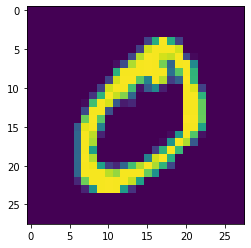

0


In [40]:
# View 2nd Image

plt.imshow(x_train[1]) #training image
plt.show()
print(y_train[1]) #what the number is supposed to be

In [0]:
# Specify the shape dimesnions 28*28 pixels on a 2D plane
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

 
#Normalize the pixel values from a scale out of 255 to a scale out of 1 (1-255 reperesentation)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [42]:
# Get the Second image value
print(y_train[1])

# One-hot encode, so we have array representation, where position in array is equivalent to the actual number (Use of 'categorically' to prevent output being passed, being a decimal)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print(y_train[1])

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
# Create a Sequential Convolutional 2D Model 
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2))) # Takes the maximum from 2x2 pixel
model.add(keras.layers.Dropout(0.25)) # Reduce overfitting
model.add(keras.layers.Flatten()) # Takes the extremes of pixels so they are set to either 1 or 0
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5)) # Reduce overfitting
model.add(keras.layers.Dense(10, activation='softmax'))

In [46]:
#Train the model using AdaDelta
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 152s 3ms/step - loss: 0.1996 - acc: 0.9393 - val_loss: 0.0571 - val_acc: 0.9801


In [47]:
print(model.evaluate(x_test, y_test))

10000/10000 [==============================] - 7s 728us/step
[0.05706813045837916, 0.9801]


In [0]:
# 98 Percent Accuracy achieved, can be refined further with more epochs etc..